<a href="https://colab.research.google.com/github/Padmashree02/Object-Detection-SSD_Mobilenet/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imported required libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

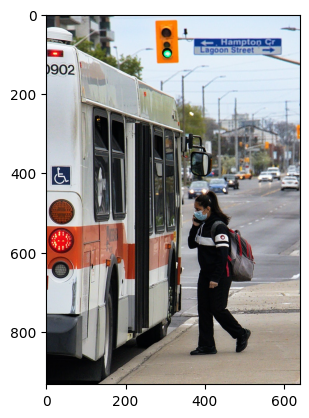

In [2]:
#Load the image for the input data purpose
img_test=cv2.imread('/content/traffic.jpg')

#Display the image by swaping BGR to RGB format
plt.imshow(img_test[:,:,::-1])

In [3]:
#Load the model
model_file = '/content/ssd_mobilenet_frozen_inference_graph.pb'   #binary file - trained weights
config_file = '/content/ssd_mobilenet_v2_coco_2018_03_29.pbtxt'   #text file- network configuration
class_file = '/content/coco_class_labels.txt'                     #Dataset

In [4]:
#Extract the classes from class file
with open (class_file,'rt') as f:
  classes=f.read().rstrip('\n').split('\n')
print(classes)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [5]:
#read the model or neural network
model=cv2.dnn.readNetFromTensorflow(model_file,config_file)

In [6]:
#Define the detection function (detects the object)

def detection(img,model):
  #Default values
  img_size=300
  mean=(0,0,0)

  #convert the image into network understanding format (blob)
  blob=cv2.dnn.blobFromImage(img,1.0,(img_size,img_size),mean,True)

  #Set the input data to the DenseNet model
  model.setInput(blob)

  #Pass the blob Forward to the DenseNet model
  detected_obj=model.forward()
  return detected_obj

In [10]:
#Define the function that display the detected class on each detected object

def draw_text(im, text, x, y):

    #Default Text values
    fontface = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 1

    #Get text size
    textSize = cv2.getTextSize(text, fontface, font_scale, thickness)  #returns in tuple
    dim = textSize[0]        # width,height
    baseline = textSize[1]

    #Use text size to create a black rectangle. (top left and bottom right)
    cv2.rectangle(im, (x, y), (x + dim[0], y + dim[1] + baseline), (255, 255, 255), cv2.FILLED);

    #Display text inside the rectangle
    cv2.putText(im, text, (x, y + dim[1]), fontface, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

In [11]:
#Object detection process

def draw_object(img_test,objects_detected,threshold):
  valid_detections=0

  #define the height and width wrt image's dimension
  rows=img_test.shape[0]
  cols=img_test.shape[1]

  #process each detection
  for object in range(objects_detected.shape[2]):

    #Extract the classID
    class_index=int(objects_detected[0,0,object,1])

    #Extract the confidence score
    score=float(objects_detected[0,0,object,2])

    #convert the normalized coordinates to origional coordinates
    x=int(objects_detected[0,0,object,3]*cols)
    y=int(objects_detected[0,0,object,4]*rows)
    w=int(objects_detected[0,0,object,5]*cols-x)
    h=int(objects_detected[0,0,object,6]*rows-y)

    #Checking whether the the object has been detected good or bad
    if score > threshold :

      #Counts the valid detections
      valid_detections=valid_detections+1

      #Display the class name
      draw_text(img_test,classes[class_index],x,y)

      #Draw the bounding box to display the detected object
      cv2.rectangle(img_test,(x,y),(x+w,y+h),(0,0,0),2)

  return img_test,valid_detections

Number of good object detection= 10
Inference time: 87.67 ms


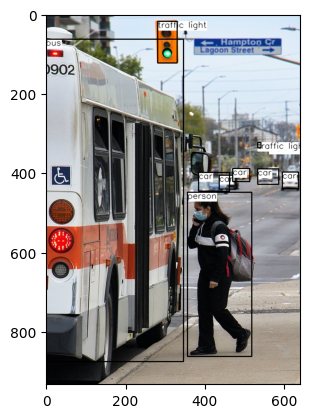

In [12]:
#Calling all the defined fucntions

#Detects the objects on the input image
objects_detected=detection(img_test,model)

#Performs object detection
img_result,valid_detections=draw_object(img_test.copy(),objects_detected,threshold=0.25)

#Display the face detection result of the image
plt.imshow(img_result[:,:,::-1])
print("Number of good object detection=",valid_detections)

#Computes how long does model executes Object detection on the image
t, _ = model.getPerfProfile()
time = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
print(time)

In [13]:
#Save the output image
cv2.imwrite("Object_detection.jpg",img_result)

True